***************************************************************************************
MULTICLASS CLASSIFICATION WITH DECISION TREE, RANDOM FOREST AND SVM
***************************************************************************************

DECISION TREE

In [4]:
from sklearn.tree import DecisionTreeClassifier 

from sklearn.model_selection import train_test_split 

from sklearn import metrics 

from sklearn.model_selection import cross_val_score #this uses stratified K-fold cross validation for classification and normal K-fold for regression 

from sklearn.preprocessing import StandardScaler

import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 

import seaborn as sns

In [5]:
dp = r"C:\Users\anany\Downloads\archive (3)\IRIS.csv"
df = pd.read_csv(dp)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X = df.iloc[:, :4]
y = df.iloc[: , 4:]

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

C:\Users\anany\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = DecisionTreeClassifier(max_depth=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
   

Text(0, 0.5, 'Accuracy Score')

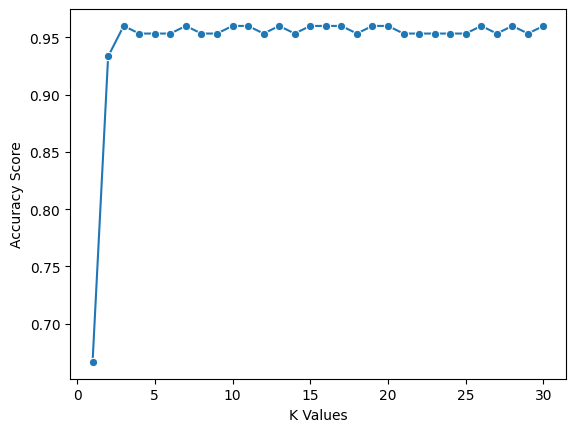

In [10]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [11]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

dt2 = DecisionTreeClassifier(max_depth=best_k)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [12]:
yk_pred = dt2.predict(X_test)


In [13]:
rep_k = metrics.classification_report(y_true=y_test, y_pred=yk_pred)
print(rep_k)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
yt = pd.DataFrame(y_test, columns=['actual value'])
res = pd.concat([yt.reset_index(drop=True), pd.DataFrame(yk_pred, columns=['predicted value'])], axis=1)
res

,actual value,predicted value
0,0,0
1,1,1
2,0,0
3,0,0
4,2,2
5,1,1
6,1,1
7,1,1
8,1,1
9,0,0


VISUALIZING TREE

In [15]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import os
os.environ["PATH"] += os.pathsep + r"C:\Users\anany\Downloads\windows_10_msbuild_Release_graphviz-9.0.0-win32\Graphviz\bin"


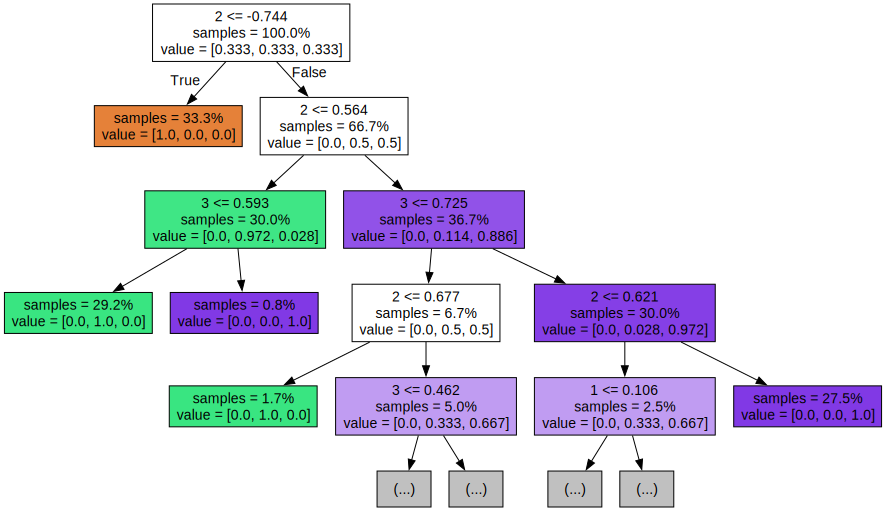

In [16]:
tree = dt2
X_t = pd.DataFrame(X_train)
d_data = export_graphviz(tree, feature_names=X_t.columns,  filled=True,  max_depth=4, impurity=False, proportion=True)
graph = graphviz.Source(d_data)
display(graph)

***************************************
RANDOM FOREST
*************************************

In [17]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split 

from sklearn import metrics 

from sklearn.model_selection import cross_val_score #this uses stratified K-fold cross validation for classification and normal K-fold for regression 

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.preprocessing import StandardScaler

import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 

import seaborn as sns

In [18]:
dp = r"C:\Users\anany\Downloads\archive (3)\IRIS.csv"
df = pd.read_csv(dp)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
X = df.iloc[:, :4]
y = df.iloc[: , 4:]

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

C:\Users\anany\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
rf = RandomForestClassifier()

# HYPERPARAMETER TUNING
# Using random search to find the best hyperparameters and thus create a more accurate model
param_dist = {'n_estimators': randint(50,500),'max_depth': randint(1,20)}
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)


rand_search.fit(X_train, y_train)

#calling the best model out of all the models created through random search
best_rf = rand_search.best_estimator_


In [23]:
y_pred = best_rf.predict(X_test)

In [24]:
rep_k = metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(rep_k)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [25]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import os
os.environ["PATH"] += os.pathsep + r"C:\Users\anany\Downloads\windows_10_msbuild_Release_graphviz-9.0.0-win32\Graphviz\bin"


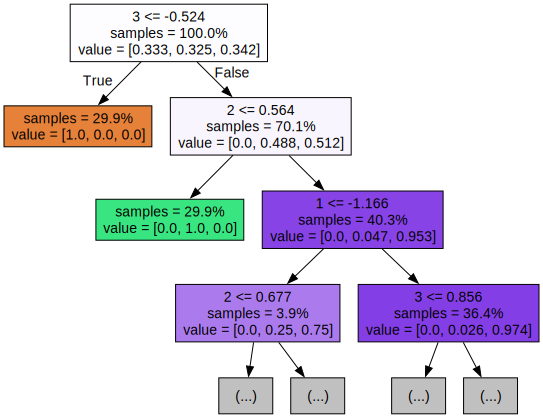

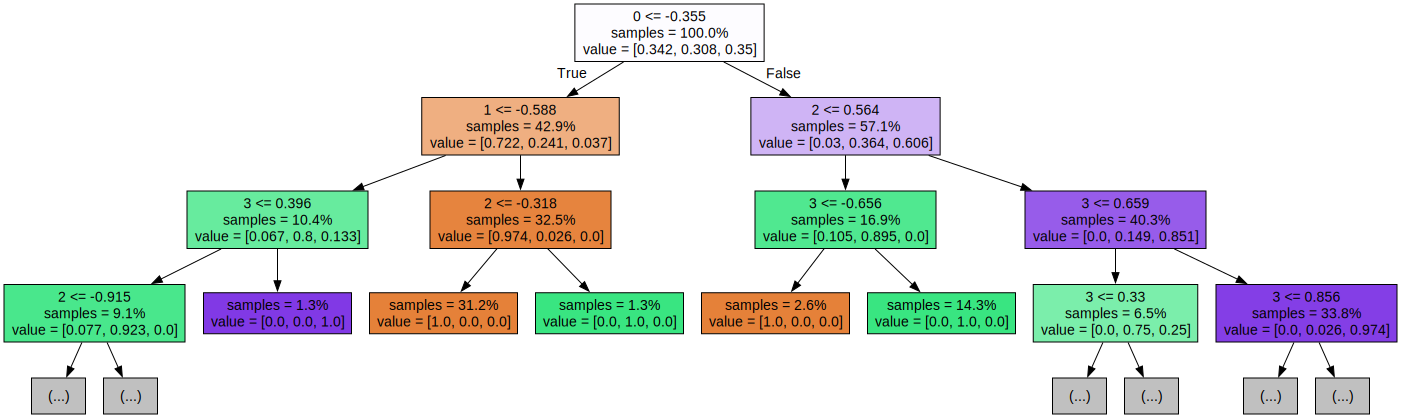

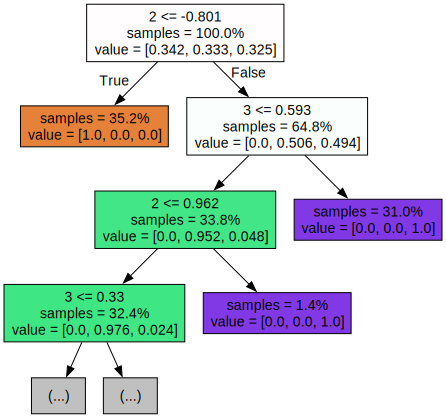

In [26]:
for i in range(3):
    tree = best_rf.estimators_[i]
    X_t = pd.DataFrame(X_train)
    dot_data = export_graphviz(tree, feature_names=X_t.columns,  filled=True,  max_depth=3, impurity=False, proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

******************************************************
SUPPORT VECTOR MACHINE
******************************************************

In [27]:
from sklearn import svm

from sklearn.model_selection import train_test_split 

from sklearn import metrics 

from sklearn.model_selection import cross_val_score #this uses stratified K-fold cross validation for classification and normal K-fold for regression 

from sklearn.preprocessing import StandardScaler

import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 

import seaborn as sns 

In [28]:
dp = r"C:\Users\anany\Downloads\archive (3)\IRIS.csv"
df = pd.read_csv(dp)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
X = df.iloc[:, :4]
y = df.iloc[: , 4:]

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

C:\Users\anany\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
svmc = svm.SVC(kernel='linear') 

In [33]:
svmc.fit(X_train, y_train)

y_pred = svmc.predict(X_test)

In [34]:
scores = cross_val_score(svmc, X, y, cv=10)
print(scores)

[1.         0.93333333 1.         1.         0.86666667 1.
 0.86666667 1.         1.         1.        ]


In [35]:
rep = metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        14
           2       0.80      0.80      0.80         5

    accuracy                           0.93        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.93      0.93      0.93        30



In [36]:
yt = pd.DataFrame(y_test, columns=['actual value'])
res = pd.concat([yt.reset_index(drop=True), pd.DataFrame(y_pred, columns=['predicted value'])], axis=1)
res

,actual value,predicted value
0,0,0
1,1,1
2,2,2
3,2,1
4,0,0
5,2,2
6,0,0
7,0,0
8,0,0
9,1,1
